In [38]:
import numpy as np
import matplotlib.pyplot as plt

np.loadtxt("51Peg_mayorqueloz95.csv", delimiter=",", skiprows=1)

array([[  2.80873, -46.96   ,   3.6    ],
       [  2.95979, -47.39   ,   4.5    ],
       [  3.62695, -19.85   ,   2.9    ],
       [  3.73265, -13.47   ,   2.6    ],
       [  3.90077,  -5.782  ,   3.     ],
       [  4.60753,  49.41   ,   2.2    ],
       [  4.78429,  58.66   ,   2.5    ],
       [  4.90699,  63.2    ,   3.2    ],
       [  5.60503,  45.6    ,   2.7    ],
       [  5.92544,  17.88   ,   3.3    ],
       [ 11.6443 , -45.5    ,   4.7    ],
       [ 11.8378 , -38.98   ,   4.9    ],
       [ 12.6355 ,  27.27   ,   5.2    ],
       [ 12.8664 ,  32.45   ,   6.5    ],
       [ 13.6242 ,  63.38   ,   4.6    ],
       [ 13.8295 ,  54.78   ,   6.2    ],
       [ 14.6428 ,  -1.34   ,   5.4    ],
       [ 14.7229 ,  -5.477  ,   5.5    ],
       [ 14.8161 , -10.73   ,   4.4    ],
       [ 14.9043 , -26.29   ,   7.3    ],
       [ 15.6261 , -50.68   ,   4.6    ],
       [ 15.7467 , -45.78   ,   4.6    ],
       [ 15.8654 , -57.54   ,   5.6    ],
       [ 16.6149 ,  10.56   ,   5.

          JD    vrad  vrad_uncertainty
0    0.00000 -46.960               3.6
1    0.15106 -47.390               4.5
2    0.81822 -19.850               2.9
3    0.92392 -13.470               2.6
4    1.09204  -5.782               3.0
..       ...     ...               ...
77  30.79857   2.696               4.4
78  30.84397  11.460               4.6
79  30.88947  14.020               4.6
80  30.92437  17.550               7.5
81  32.78827  19.740               2.4

[82 rows x 3 columns]


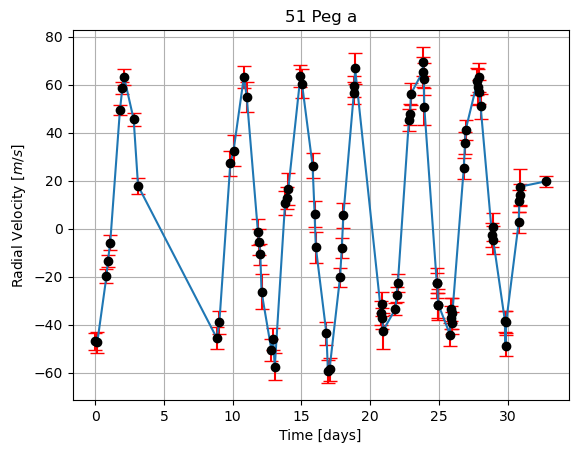

0      0.00000
1      0.15106
2      0.81822
3      0.92392
4      1.09204
        ...   
77    30.79857
78    30.84397
79    30.88947
80    30.92437
81    32.78827
Name: JD, Length: 82, dtype: float64
Initial guesses for P and K are 4.23 and 55.6 respectively


In [39]:
import pandas as pd
from astropy.time import Time

data = pd.read_csv("51Peg_mayorqueloz95.csv")


data['JD']= data['JD'] -  data['JD'][0]
print(data)
iso_dates = times.iso  # Converts to ISO format
#print(iso_dates)


plt.errorbar(data["JD"], data["vrad"], yerr=data["vrad_uncertainty"], fmt='o', color='black', ecolor='red', capsize=5)
plt.plot(data["JD"], data["vrad"])
plt.xlabel("Time [days]")
plt.ylabel("Radial Velocity $[m/s]$")  
plt.title("51 Peg a")
plt.savefig("pdf/51Peg.pdf")
plt.grid()
plt.show()

print(data["JD"])

# Initial guesses for P and K
P_guess=4.23
K_guess=55.6
print(f'Initial guesses for P and K are {P_guess} and {K_guess} respectively')




In [ ]:
def chi_squared(data, data_uncertainty, model):
    return np.sum(((data - model)/ data_uncertainty)**2)


def vrad(t,P, K, f, f0, v0):
    return K * np.sin(2 * np.pi * (t/P - f0)) + v0

delta_P = 1
P_values = np.arange(P_guess - delta_P, P_guess + delta_P, 0.01)
print(P_values)

delta_K = 10
K_values = np.arange(K_guess - delta_K, K_guess + delta_K, 0.01)


f0_values = np.arange(0, 1, 0.01)

v0_guess = 0
delta_v0 = 10
v0_values = np.arange(v0_guess - delta_v0, v0_guess + delta_v0, 0.01)


[3.23 3.24 3.25 3.26 3.27 3.28 3.29 3.3  3.31 3.32 3.33 3.34 3.35 3.36
 3.37 3.38 3.39 3.4  3.41 3.42 3.43 3.44 3.45 3.46 3.47 3.48 3.49 3.5
 3.51 3.52 3.53 3.54 3.55 3.56 3.57 3.58 3.59 3.6  3.61 3.62 3.63 3.64
 3.65 3.66 3.67 3.68 3.69 3.7  3.71 3.72 3.73 3.74 3.75 3.76 3.77 3.78
 3.79 3.8  3.81 3.82 3.83 3.84 3.85 3.86 3.87 3.88 3.89 3.9  3.91 3.92
 3.93 3.94 3.95 3.96 3.97 3.98 3.99 4.   4.01 4.02 4.03 4.04 4.05 4.06
 4.07 4.08 4.09 4.1  4.11 4.12 4.13 4.14 4.15 4.16 4.17 4.18 4.19 4.2
 4.21 4.22 4.23 4.24 4.25 4.26 4.27 4.28 4.29 4.3  4.31 4.32 4.33 4.34
 4.35 4.36 4.37 4.38 4.39 4.4  4.41 4.42 4.43 4.44 4.45 4.46 4.47 4.48
 4.49 4.5  4.51 4.52 4.53 4.54 4.55 4.56 4.57 4.58 4.59 4.6  4.61 4.62
 4.63 4.64 4.65 4.66 4.67 4.68 4.69 4.7  4.71 4.72 4.73 4.74 4.75 4.76
 4.77 4.78 4.79 4.8  4.81 4.82 4.83 4.84 4.85 4.86 4.87 4.88 4.89 4.9
 4.91 4.92 4.93 4.94 4.95 4.96 4.97 4.98 4.99 5.   5.01 5.02 5.03 5.04
 5.05 5.06 5.07 5.08 5.09 5.1  5.11 5.12 5.13 5.14 5.15 5.16 5.17 5.18
 5.19 5.2